In [ ]:
TRAIN_PATH = "/content/drive/MyDrive/TARP_dataset/Train"
TEST_PATH = "/content/drive/MyDrive/TARP_dataset/Test"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
rms = keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.95)

# adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
adadelta = keras.optimizers.Adadelta(
    learning_rate=0.0001, rho=0.95, epsilon=1e-07
)

In [ ]:
# CNN model in keras

model = Sequential()
model.add(Conv2D(16,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(16,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=5,activation='relu'))
model.add(Conv2D(64,kernel_size=5,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,kernel_size=5,activation='relu'))
model.add(Conv2D(128,kernel_size=5,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Dense(512))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=rms,metrics=['categorical_accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 220, 220, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 106, 106, 32)      1

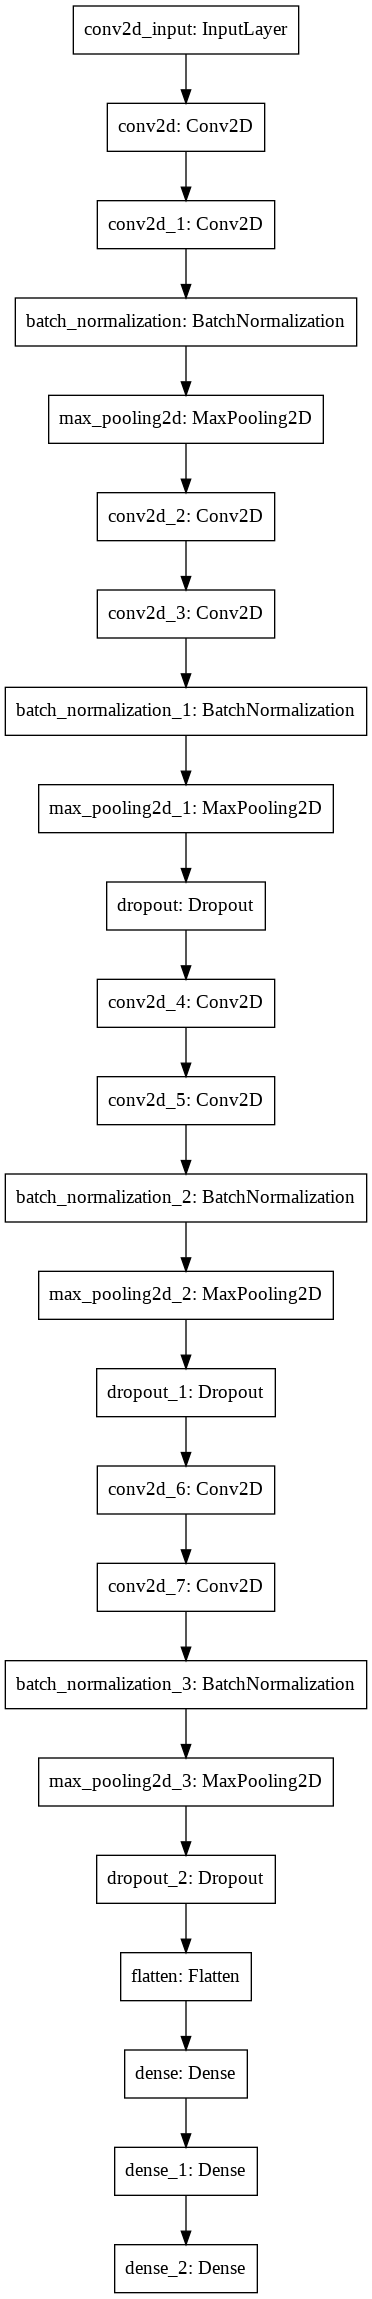

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
# Image Data generator for Training directory

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/COVID_DATASET/COVID_DATASET/Train',
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 2400 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'COVID': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/COVID_DATASET/COVID_DATASET/Test',
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 610 images belonging to 3 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=16,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=16
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
16/16 [==============================] - 176s 9s/step - loss: 12.6987 - categorical_accuracy: 0.5165 - val_loss: 1.2610 - val_categorical_accuracy: 0.3242
Epoch 2/100
16/16 [==============================] - 106s 7s/step - loss: 1.7256 - categorical_accuracy: 0.7596 - val_loss: 1.6750 - val_categorical_accuracy: 0.3203
Epoch 3/100
16/16 [==============================] - 82s 5s/step - loss: 1.5648 - categorical_accuracy: 0.7902 - val_loss: 3.0935 - val_categorical_accuracy: 0.3242
Epoch 4/100
16/16 [==============================] - 61s 4s/step - loss: 2.1655 - categorical_accuracy: 0.6817 - val_loss: 2.1320 - val_categorical_accuracy: 0.3477
Epoch 5/100
16/16 [==============================] - 53s 3s/step - loss: 1.4707 - categorical_accuracy: 0.7771 - val_loss: 3.9828 - val_categorical_accuracy: 0.3281
Epoch 6/100
16/16 [==============================] - 51s 3s/step - loss: 1.3902 - categorical_accuracy: 0.8074 - val_loss: 3.1696 - val_categorical_accuracy: 0.3516
Epoch 7

In [ ]:
import random
import tensorflow
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
layer_outputs = [layer.output for layer in model.layers[1:]]

In [ ]:
visualize_model = tensorflow.keras.models.Model(inputs = model.input, outputs = layer_outputs)

In [ ]:
img=load_img('/content/drive/MyDrive/COVID_DATASET/COVID_DATASET/Test/COVID/COVID-1000.png',target_size=(224,224))

In [ ]:
x = img_to_array(img)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x.reshape((1,224,224,3))
print(x.shape)

(1, 224, 224, 3)


In [ ]:
x=x/225

In [ ]:
feature_maps=visualize_model.predict(x)
print(len(feature_maps))

22


In [ ]:
layer_names = [layer.name for layer in model.layers]
print(layer_names)

['conv2d', 'conv2d_1', 'batch_normalization', 'max_pooling2d', 'conv2d_2', 'conv2d_3', 'batch_normalization_1', 'max_pooling2d_1', 'dropout', 'conv2d_4', 'conv2d_5', 'batch_normalization_2', 'max_pooling2d_2', 'dropout_1', 'conv2d_6', 'conv2d_7', 'batch_normalization_3', 'max_pooling2d_3', 'dropout_2', 'flatten', 'dense', 'dense_1', 'dense_2']


In [ ]:
%matplotlib inline

(1, 220, 220, 16)
(1, 220, 220, 16)
(1, 110, 110, 16)
(1, 108, 108, 32)
(1, 106, 106, 32)
(1, 106, 106, 32)
(1, 53, 53, 32)
(1, 53, 53, 32)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(1, 49, 49, 64)
(1, 45, 45, 64)
(1, 45, 45, 64)
(1, 22, 22, 64)
(1, 22, 22, 64)
(1, 18, 18, 128)
(1, 14, 14, 128)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(1, 14, 14, 128)
(1, 7, 7, 128)
(1, 7, 7, 128)
(1, 6272)
(1, 1024)
(1, 512)
(1, 3)


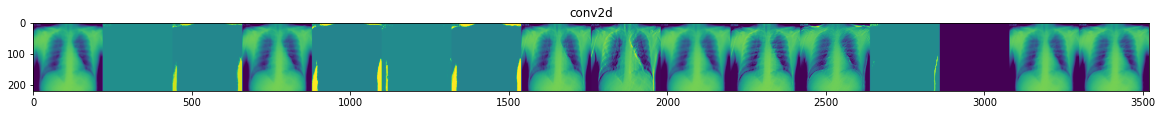

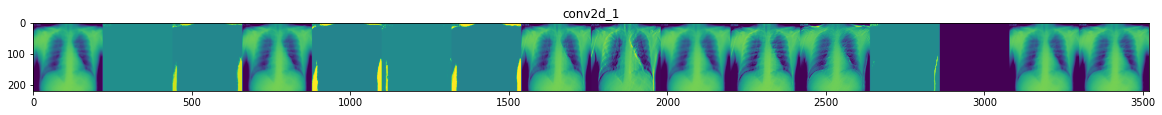

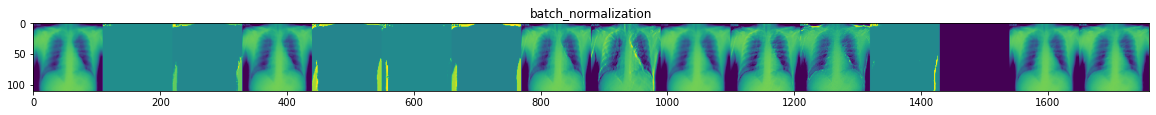

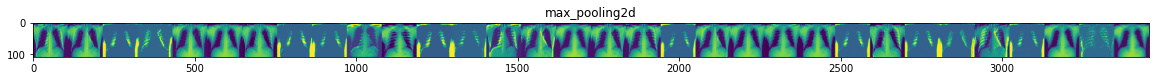

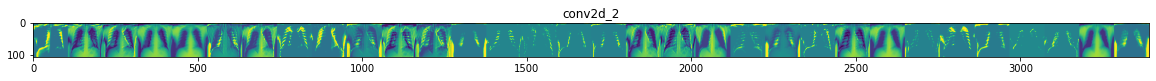

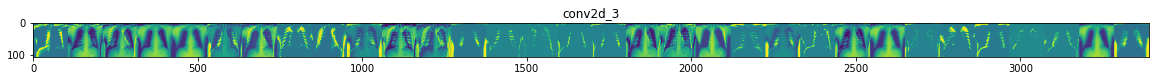

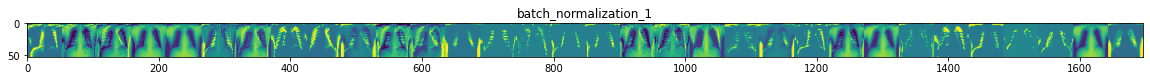

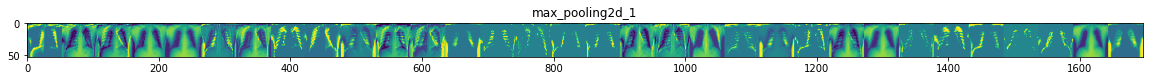

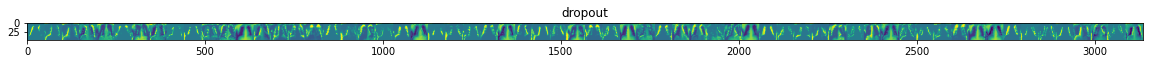

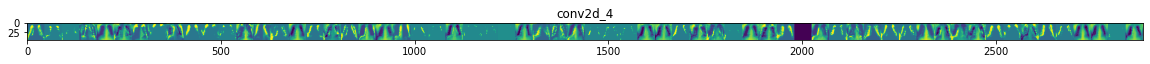

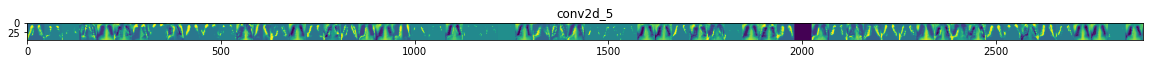

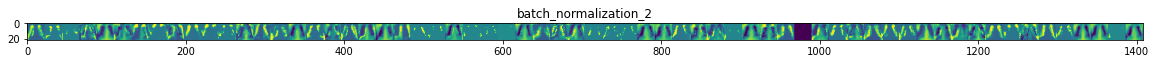

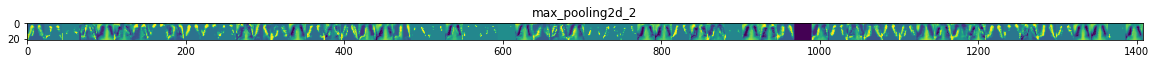

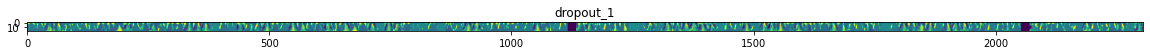

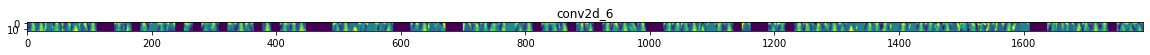

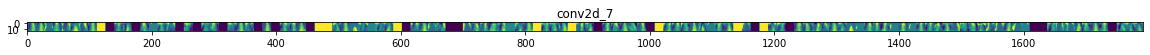

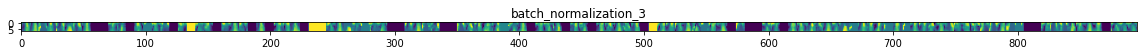

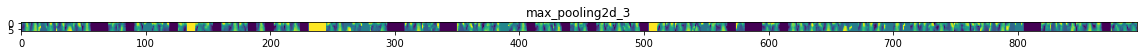

In [ ]:
for layer_names, feature_maps in zip(layer_names,feature_maps):
  print(feature_maps.shape)
  if len(feature_maps.shape) == 4 :
    channels = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size*channels))
    for i in range(channels):
      x = feature_maps[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / channels
    plt.figure(figsize=(scale*channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


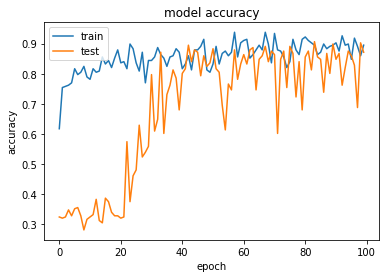

In [ ]:
#Plotting the results [accuracy]

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

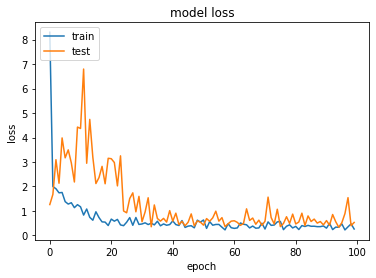

In [ ]:
#Plotting the results [loss]

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(train_generator)

150/150 [==============================] - 28s 186ms/step - loss: 0.3769 - categorical_accuracy: 0.9042


[0.3768980801105499, 0.9041666388511658]

In [ ]:
model.evaluate(validation_generator)

39/39 [==============================] - 3s 71ms/step - loss: 0.4600 - categorical_accuracy: 0.8918


[0.4600028991699219, 0.8918032646179199]